In [47]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv('ds_02.csv')

In [49]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [51]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# MISSING_VALUES

In [52]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [53]:
df = df.drop(['Cabin'], axis=1)

In [54]:
df['Embarked'].fillna('S', inplace=True)
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [55]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

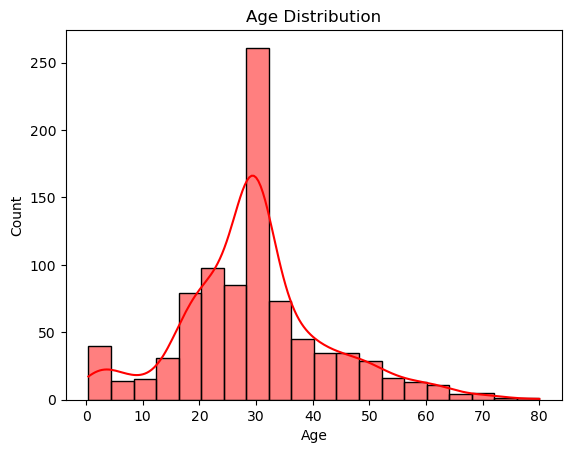

In [56]:
sns.histplot(df['Age'], bins=20, color='red' ,kde=True)
plt.title('Age Distribution')
plt.show()

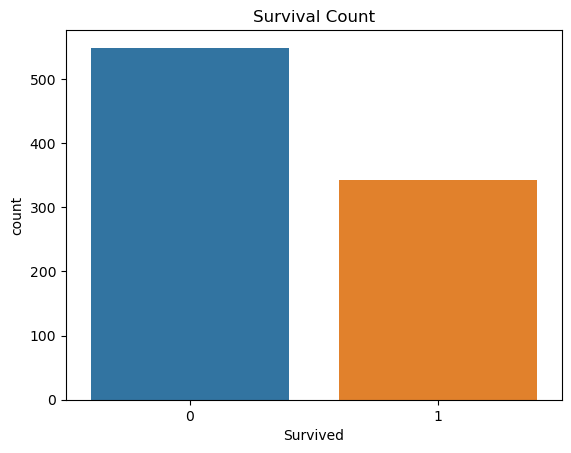

In [57]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

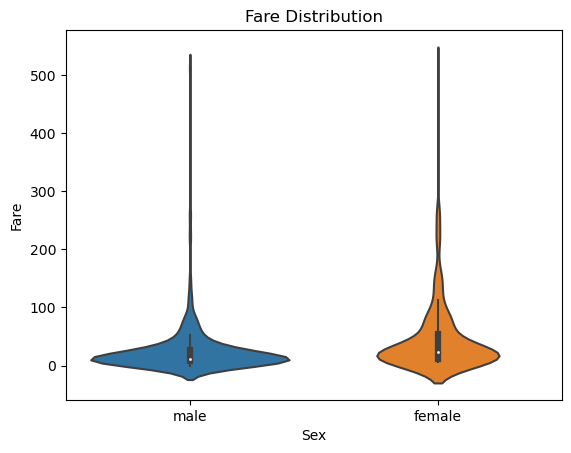

In [58]:
sns.violinplot(x='Sex', y='Fare', data=df)
plt.title('Fare Distribution')
plt.show()

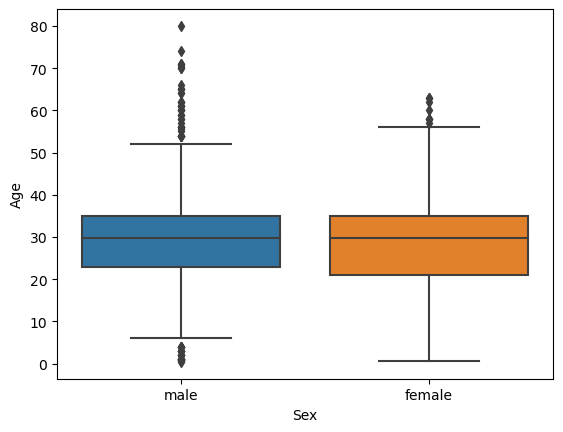

In [59]:
sns.boxplot(x='Sex', y='Age', data=df)
plt.show()

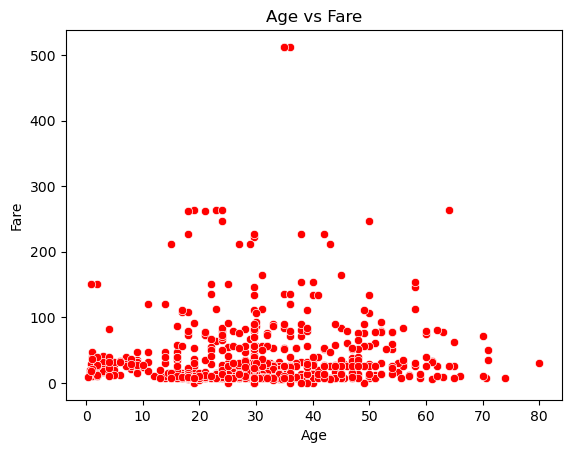

In [60]:
sns.scatterplot(x='Age', y='Fare', data=df , color='red')
plt.title('Age vs Fare')
plt.show()

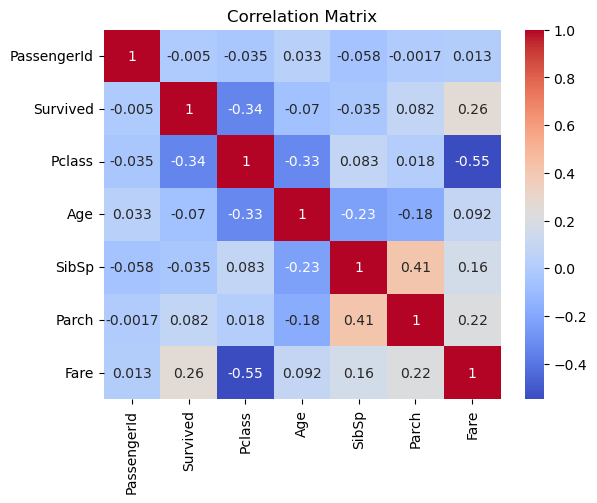

In [61]:
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

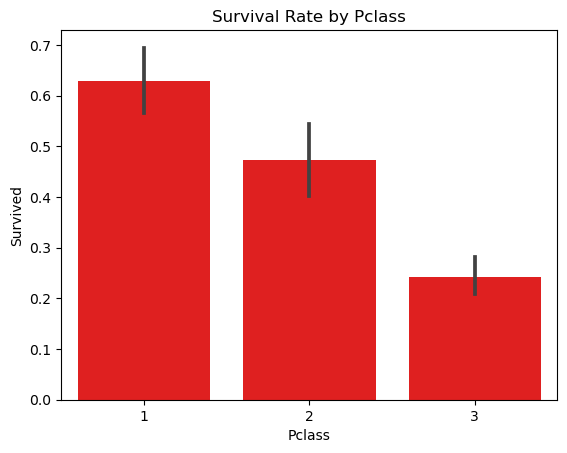

In [62]:
sns.barplot(x='Pclass', y='Survived', data=df , color='red')
plt.title('Survival Rate by Pclass')
plt.show()

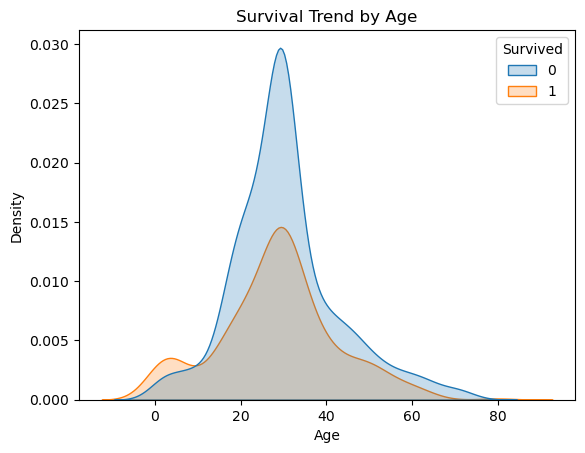

In [63]:
sns.kdeplot(x='Age', hue='Survived', data=df, fill=True)
plt.title('Survival Trend by Age')
plt.show()

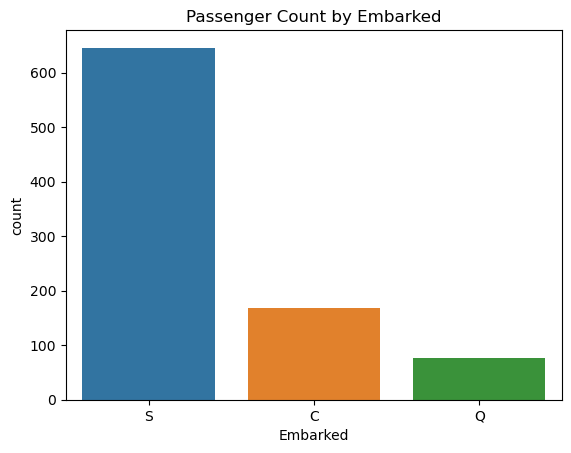

In [64]:
sns.countplot(x='Embarked', data=df)
plt.title('Passenger Count by Embarked')
plt.show()